In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Run the Linear regression model to predict the full price:
write here the summery and conclusions

In [226]:
# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_05_07.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_20_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_25_06.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

In [227]:
df

,Snapshot,start_date,end_date,name,TTT,LOS,score,reviews,price_per_night,original_price,...,No_payment,Breakfast,Option Member,Index,star_rating,location_rating,neighborhood,km_from_center,neighborhood_category,full_price
0,14:43.1,06/07/2024,07/07/2024,Omni Berkshire Place,1,1,9.290000,1223,269,299,...,0,0,0,3,4.0,9.600000,Midtown East,1.1,Midtown Manhattan,269
1,14:43.1,06/07/2024,07/07/2024,The Washington by LuxUrban,1,1,8.280000,1006,188,209,...,0,0,0,6,4.0,9.400000,Manhattan,7.1,Other Manhattan,188
2,14:43.2,06/07/2024,07/07/2024,Hyatt Grand Central New York,1,1,8.080000,3726,246,289,...,0,0,0,11,4.0,9.306447,Midtown East,1.9,Midtown Manhattan,246
3,14:43.2,06/07/2024,07/07/2024,"The Cloud One New York-Downtown, by the Motel ...",1,1,8.880000,625,189,0,...,0,0,0,12,4.0,8.900000,Manhattan,7.0,Other Manhattan,189
4,14:43.2,06/07/2024,07/07/2024,45 Times Square Hotel,1,1,8.680000,1268,270,300,...,0,0,1,13,3.0,9.600000,Manhattan,1.2,Other Manhattan,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41907,42:19.2,25/07/2024,30/07/2024,The Maritime Hotel,30,5,9.490000,1015,311,359,...,0,0,0,242,4.0,9.600000,Chelsea,3.4,Midtown Manhattan,1555
41908,42:19.3,25/07/2024,30/07/2024,Doxie Hotel,30,5,8.770833,760,197,0,...,0,0,0,244,2.0,9.445409,Manhattan,1.7,Other Manhattan,985
41909,42:19.4,25/07/2024,30/07/2024,The Herald by LuxUrban,30,5,8.080000,224,255,284,...,0,0,1,247,3.0,9.600000,Manhattan,2.0,Other Manhattan,1275
41910,42:19.4,25/07/2024,30/07/2024,AC Hotel by Marriott New York Times Square,30,5,9.090000,1001,268,0,...,0,0,0,248,4.0,9.445409,Manhattan,1.6,Other Manhattan,1340


Linear Regression Results:
Train R2: 0.8332071253190413
Train RMSE: 150.8685953878987
Train MSE: 22761.333074317485
Train MAE: 109.16812338286388
Test R2: 0.834907770197391
Test RMSE: 150.68718709461888
Test MSE: 22706.628354488672
Test MAE: 109.83028955814028


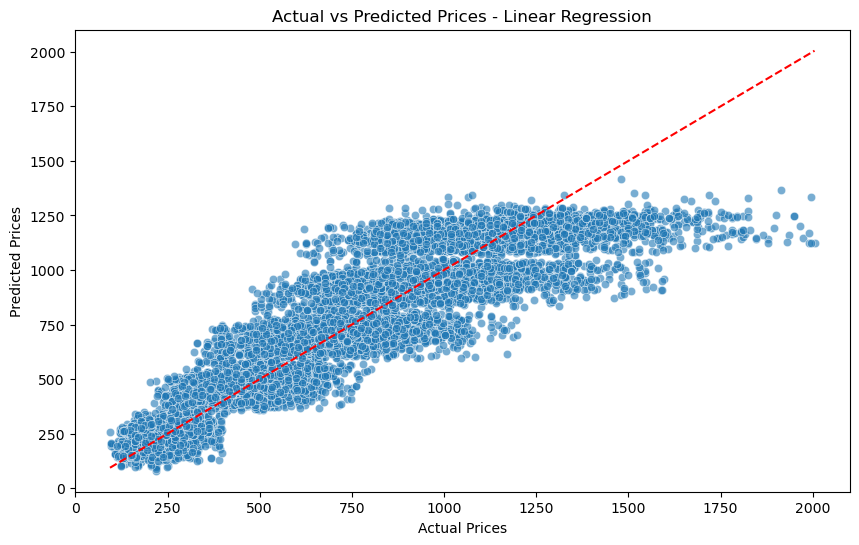

In [228]:
# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'full_price',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center']

df = df[columns_to_use]

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['full_price'])
y = df['full_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("Linear Regression Results:")
print(f"Train R2: {train_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

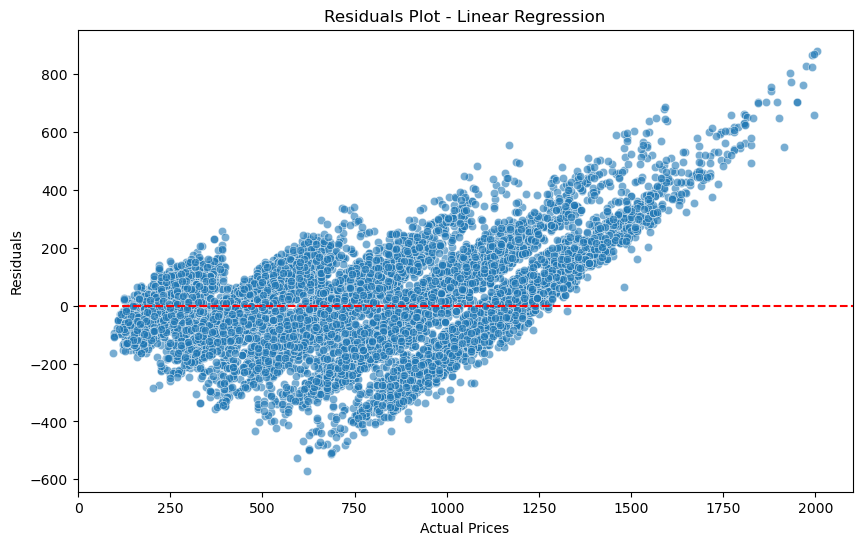

In [229]:
# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - Linear Regression')
plt.show()

# Run the model to predict price full price after feature engineering:

In [230]:
# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_features_engineering_20_06.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_features_engineering_25_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_features_engineering_05_07.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

Linear Regression Results:
Train R2: 0.858518389411702
Train RMSE: 139.55250899562395
Train MSE: 19474.902766973708
Train MAE: 102.2919295233068
Test R2: 0.8541159668506073
Test RMSE: 140.22283446543184
Test MSE: 19662.4433055199
Test MAE: 103.21487626170634


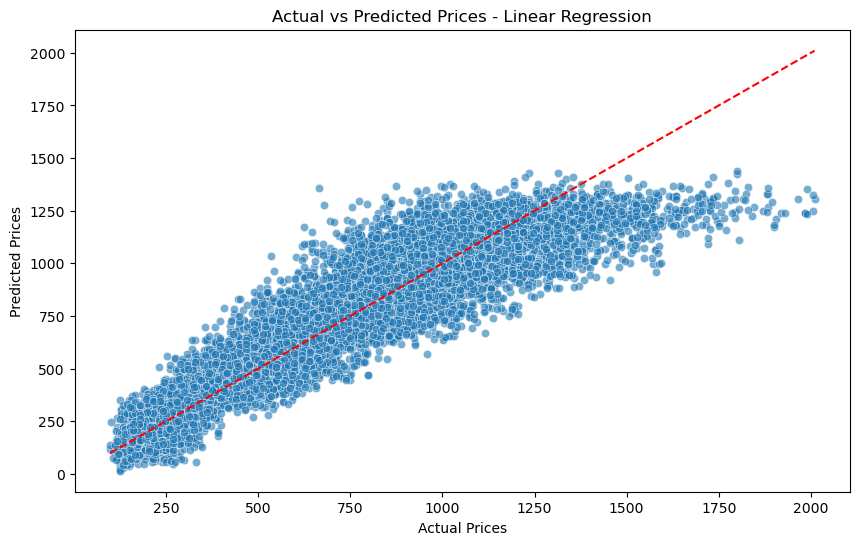

In [231]:
# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'full_price',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center',
       'checkin_day', 'checkout_day', 'checkin_day_name_Friday',
       'checkin_day_name_Monday', 'checkin_day_name_Saturday',
       'checkin_day_name_Sunday', 'checkin_day_name_Thursday',
       'checkin_day_name_Tuesday', 'checkin_day_name_Wednesday',
       'checkin_day_name_nan', 'checkout_day_name_Friday',
       'checkout_day_name_Monday', 'checkout_day_name_Saturday',
       'checkout_day_name_Sunday', 'checkout_day_name_Thursday',
       'checkout_day_name_Tuesday', 'checkout_day_name_Wednesday',
       'checkout_day_name_nan', 'period_of_the_month_beginning of the month',
       'period_of_the_month_end of the month',
       'period_of_the_month_middle of the month']
df = df[columns_to_use]

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['full_price'])
y = df['full_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("Linear Regression Results:")
print(f"Train R2: {train_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

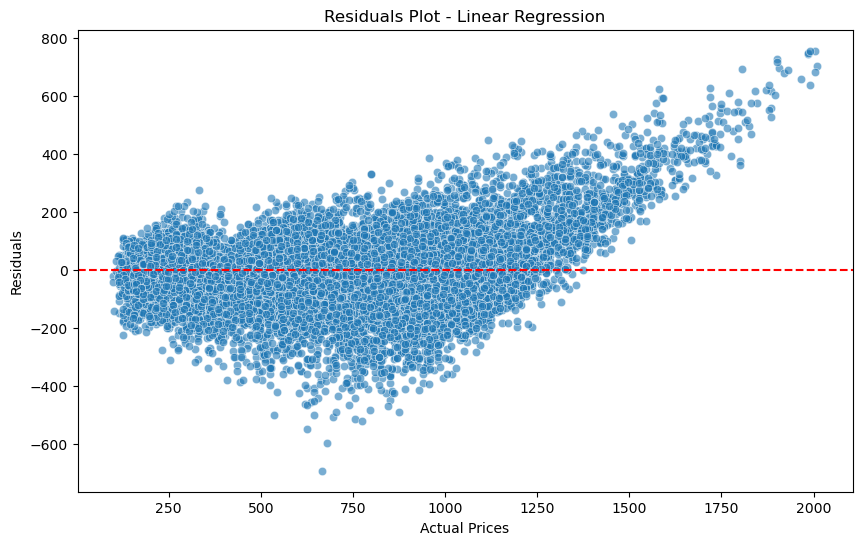

In [232]:
# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - Linear Regression')
plt.show()

# Repeat the process but on data after normalization
1. Linear regression on normalized data
2. Linear regression on normalized data with features engineering

In [8]:
# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_normalized_data_05_07.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_normalized_data_20_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_normalized_data_25_06.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

Linear Regression Results:
Train R2: 0.838992004797128
Train RMSE: 0.4007921097524399
Train MSE: 0.16063431523981184
Train MAE: 0.2919955274699031
Test R2: 0.8402867327726011
Test RMSE: 0.40069024840779305
Test MSE: 0.1605526751690989
Test MAE: 0.2934459345773381


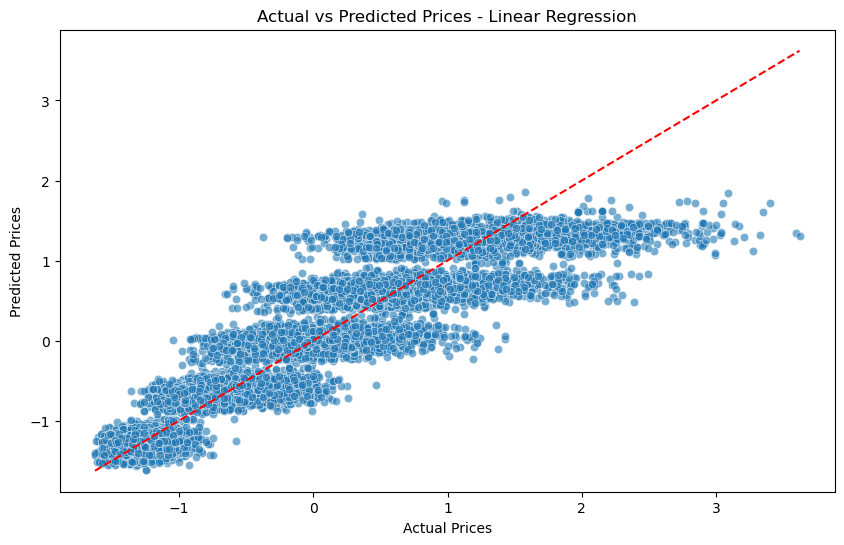

In [10]:
# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'full_price',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center']

df = df[columns_to_use]

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['full_price'])
y = df['full_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("Linear Regression Results:")
print(f"Train R2: {train_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

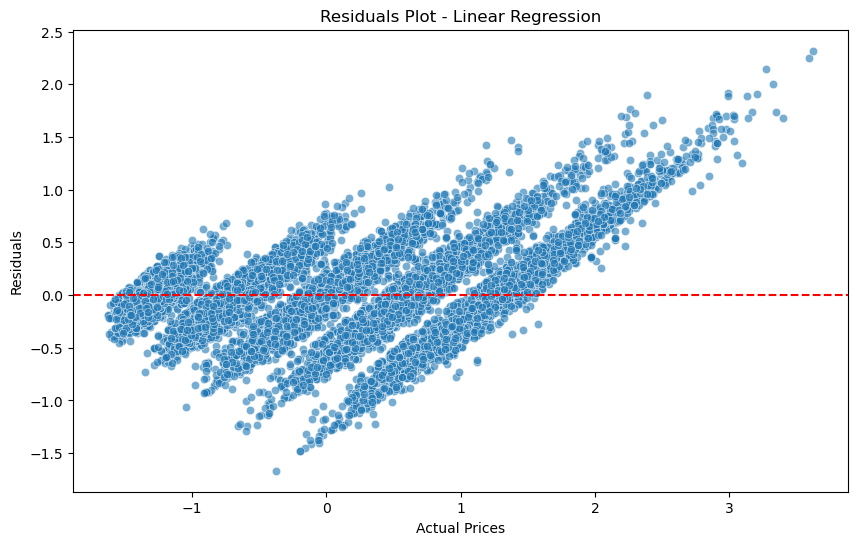

In [11]:
# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - Linear Regression')
plt.show()

In [12]:
# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_normalized_with_features_engineering_20_06.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_normalized_with_features_engineering_25_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_normalized_with_features_engineering_05_07.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

Linear Regression Results:
Train R2: 0.8599499714787397
Train RMSE: 0.3744828509431289
Train MSE: 0.14023740565049367
Train MAE: 0.2760741455605074
Test R2: 0.8555864566328075
Test RMSE: 0.3793635140730981
Test MSE: 0.14391667580988968
Test MAE: 0.28132508422286834


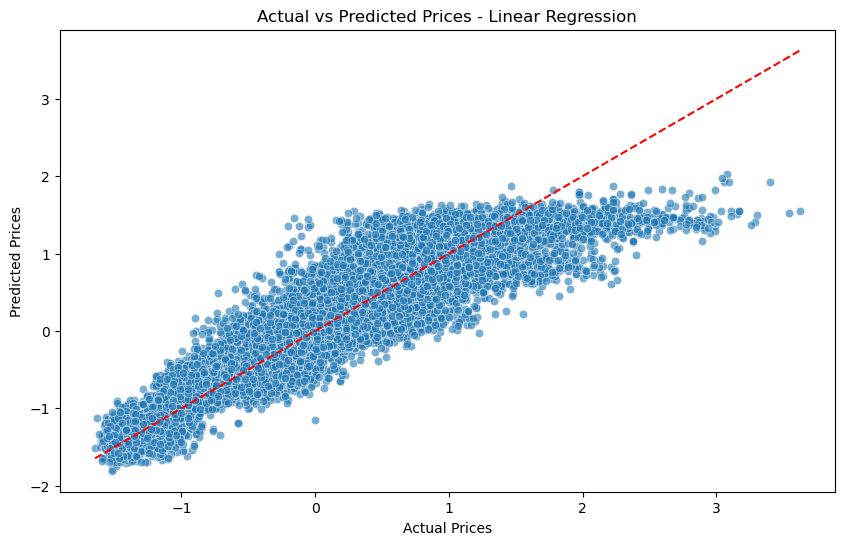

In [13]:
# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'full_price',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center',
       'checkin_day', 'checkout_day', 'checkin_day_name_Friday',
       'checkin_day_name_Monday', 'checkin_day_name_Saturday',
       'checkin_day_name_Sunday', 'checkin_day_name_Thursday',
       'checkin_day_name_Tuesday', 'checkin_day_name_Wednesday',
       'checkin_day_name_nan', 'checkout_day_name_Friday',
       'checkout_day_name_Monday', 'checkout_day_name_Saturday',
       'checkout_day_name_Sunday', 'checkout_day_name_Thursday',
       'checkout_day_name_Tuesday', 'checkout_day_name_Wednesday',
       'checkout_day_name_nan', 'period_of_the_month_beginning of the month',
       'period_of_the_month_end of the month',
       'period_of_the_month_middle of the month']
df = df[columns_to_use]

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['full_price'])
y = df['full_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("Linear Regression Results:")
print(f"Train R2: {train_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

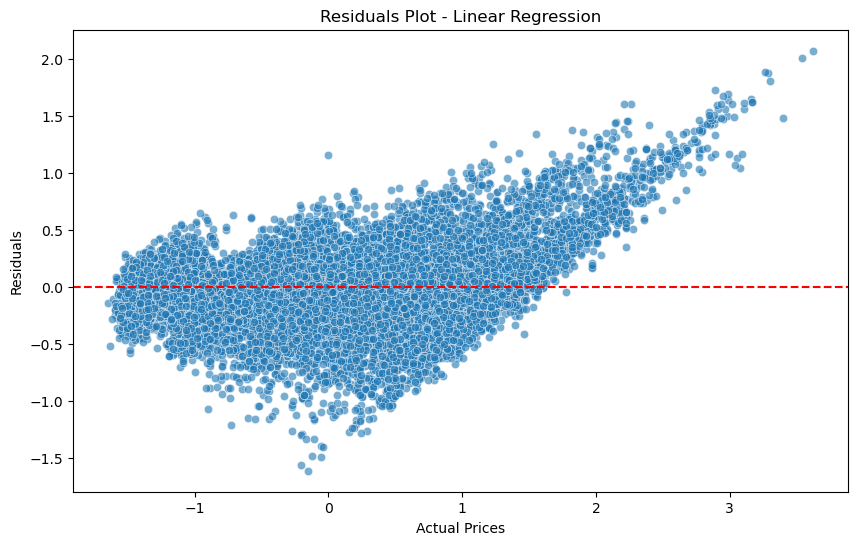

In [14]:
# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - Linear Regression')
plt.show()